In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ks_2samp,pearsonr
from scipy.stats import iqr
from itertools import permutations,combinations
from more_itertools import windowed
from collections import namedtuple
from functools import partial
%config InlineBackend.figure_format='retina'

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interactive, IntSlider
from IPython.display import display

In [4]:
def triplet_pid(pid:pd.DataFrame,channels:list[str])->pd.DataFrame:
    p = list(permutations(channels))
    return pid[(pid.source1==p[0][0]) & (pid.source2==p[0][1]) & (pid.target==p[0][2]) |
               (pid.source1==p[1][0]) & (pid.source2==p[1][1]) & (pid.target==p[1][2]) |
               (pid.source1==p[2][0]) & (pid.source2==p[2][1]) & (pid.target==p[2][2]) |
               (pid.source1==p[3][0]) & (pid.source2==p[3][1]) & (pid.target==p[3][2]) |
               (pid.source1==p[4][0]) & (pid.source2==p[4][1]) & (pid.target==p[4][2]) |
               (pid.source1==p[5][0]) & (pid.source2==p[5][1]) & (pid.target==p[5][2])]

In [5]:
def visualize_triplets(channels:list[str])->None:
    possible_triplets = list(combinations(channels,3))
    for triplet in possible_triplets:
        resttriplet = triplet_pid(pid_sin_rest,triplet)
        tasktriplet = triplet_pid(pid_sin_task,triplet)
        display(resttriplet.join(tasktriplet.sinergytask).style.background_gradient(cmap='YlOrRd',vmin=0,vmax=0.3))
    return

In [6]:
def cyclic_perm(a):
    n = len(a)
    b = [[a[i - j] for i in range(n)] for j in range(n)]
    return b

In [7]:
# condition = '(pid_task["source1"].str.contains("'+a+'")) | (pid_task["source1"].str.contains("'+b+'")) | (pid_task["source1"].str.contains("'+c+'"))'

# <center> Statitical Analysis a la Functional Networks Similarity

In [8]:
coords = namedtuple('coords',['x','y'])

channel_coords = {'EEG Fz':coords(638,370),
                  'EEG Cz':coords(638,575),
                  'EEG Pz':coords(638,780),
                  'EEG C4':coords(843,575),
                  'EEG T4':coords(1048,575),
                  'EEG F4':coords(808,370),
                  'EEG F8':coords(968,340),
                  'EEG F4':coords(770,195),
                  'EEG P4':coords(808,780),
                  'EEG T6':coords(970,815),
                  'EEG O2':coords(770,960),
                  'EEG Fp2':coords(770,195),
                  'EEG T3':coords(235,575),
                  'EEG C3':coords(433,575),
                  'EEG F3':coords(473,370),
                  'EEG F7':coords(313,340),
                  'EEG Fp1':coords(510,195),                  
                  'EEG P3':coords(473,780),
                  'EEG T5':coords(310,815),
                  'EEG O1':coords(510,960)
                 }

In [36]:
synsrest = []
synstask = []
redsrest = []
redstask = []

for i in range(35):
#     pidtask = pd.read_csv(r"C:\Users\rober\NeuNet\ArithmeticTasks\resultsPID\task_UNIPA_PC\Subject"+str(i)+"_PID_task_128Hz_NonBinary5.csv")
#     pidrest = pd.read_csv(r"C:\Users\rober\NeuNet\ArithmeticTasks\resultsPID\rest_UNIPA_PC\Subject"+str(i)+"_PID_rest_128Hz_NonBinary5.csv")

#     pidtask = pd.read_csv(r"C:\Users\rober\NeuNet\ArithmeticTasks\resultsPID\task\Subject"+str(i)+"_PID_task.csv")
#     pidrest = pd.read_csv(r"C:\Users\rober\NeuNet\ArithmeticTasks\resultsPID\rest\Subject"+str(i)+"_PID_rest.csv")

    pidtask = pd.read_csv(r"C:\Users\rober\NeuNet\ArithmeticTasks\resultsPID\task\continuous\Subject"+str(i)+"_PID_task_128Hz_continuous.csv")
    pidrest = pd.read_csv(r"C:\Users\rober\NeuNet\ArithmeticTasks\resultsPID\rest\continuous\Subject"+str(i)+"_PID_rest_128Hz_continuous.csv")

#     pidtask = pidtask[(pidtask["source1"].str.contains("z")==False) &
#                       (pidtask["source2"].str.contains("z")==False) &
#                       (pidtask["target"].str.contains("z")==False)]    

#     pidrest = pidrest[(pidrest["source1"].str.contains("z")==False) &
#                       (pidrest["source2"].str.contains("z")==False) &
#                       (pidrest["target"].str.contains("z")==False)]
    
    synsrest.append(pidrest.sinergy.to_numpy()) 
    synstask.append(pidtask.sinergy.to_numpy()) 
    redsrest.append(pidrest.redundancy.to_numpy()) 
    redstask.append(pidtask.redundancy.to_numpy()) 

synsrest = np.array(synsrest) 
synstask = np.array(synstask) 
redsrest = np.array(redsrest) 
redstask = np.array(redstask)      
syns     = np.vstack((synsrest,synstask)) 
reds     = np.vstack((redsrest,redstask)) 

# <center>Synergies

In [37]:
similarity_matrix_syns = np.corrcoef(syns)

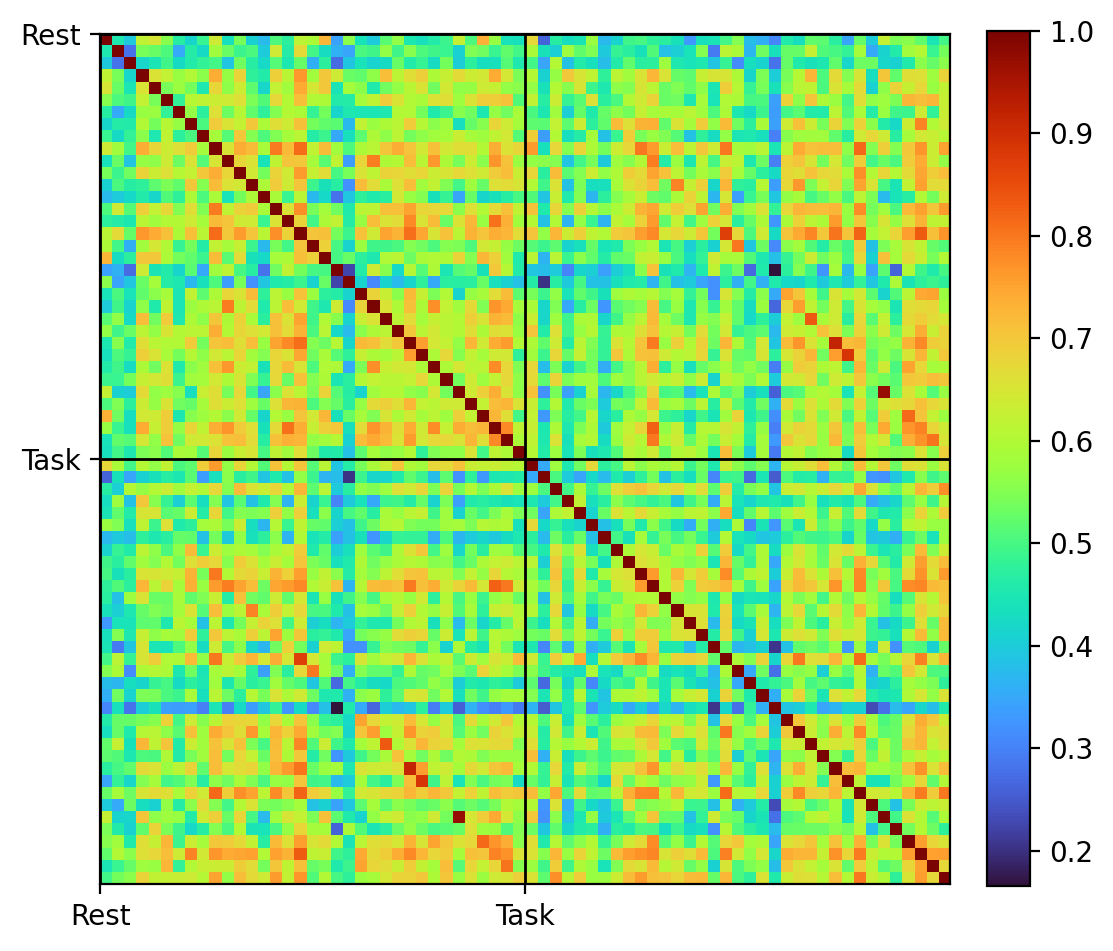

In [38]:
plt.figure(figsize=(6,6))
plt.imshow(similarity_matrix_syns,cmap='turbo', aspect='equal')
# plt.xticks(np.arange(1.5,70,2),range(35),rotation=45)
# plt.yticks(np.arange(1.5,70,2),range(35))
plt.xticks([-0.5,34.5],['Rest','Task'])
plt.yticks([-0.5,34.5],['Rest','Task'])

plt.grid(color='black', linestyle='-', linewidth=1)
plt.colorbar(fraction=0.046, pad=0.04)

In [39]:
restvsrest = similarity_matrix_syns[:35,:35]
taskvstask = similarity_matrix_syns[35:,35:]
restvstask = similarity_matrix_syns[:35,35:]

print('average rest vs rest similarity (across subjects):',np.mean(restvsrest))
print('average task vs task similarity (across subjects):',np.mean(taskvstask))
print('average rest vs task similarity (across subjects):',np.mean(restvstask))
print('average rest vs task similarity (same subject):',np.mean(np.diag(restvstask)))

average rest vs rest similarity (across subjects): 0.5905190615935322
average task vs task similarity (across subjects): 0.5694639404699382
average rest vs task similarity (across subjects): 0.5627019774303702
average rest vs task similarity (same subject): 0.7089702662665088


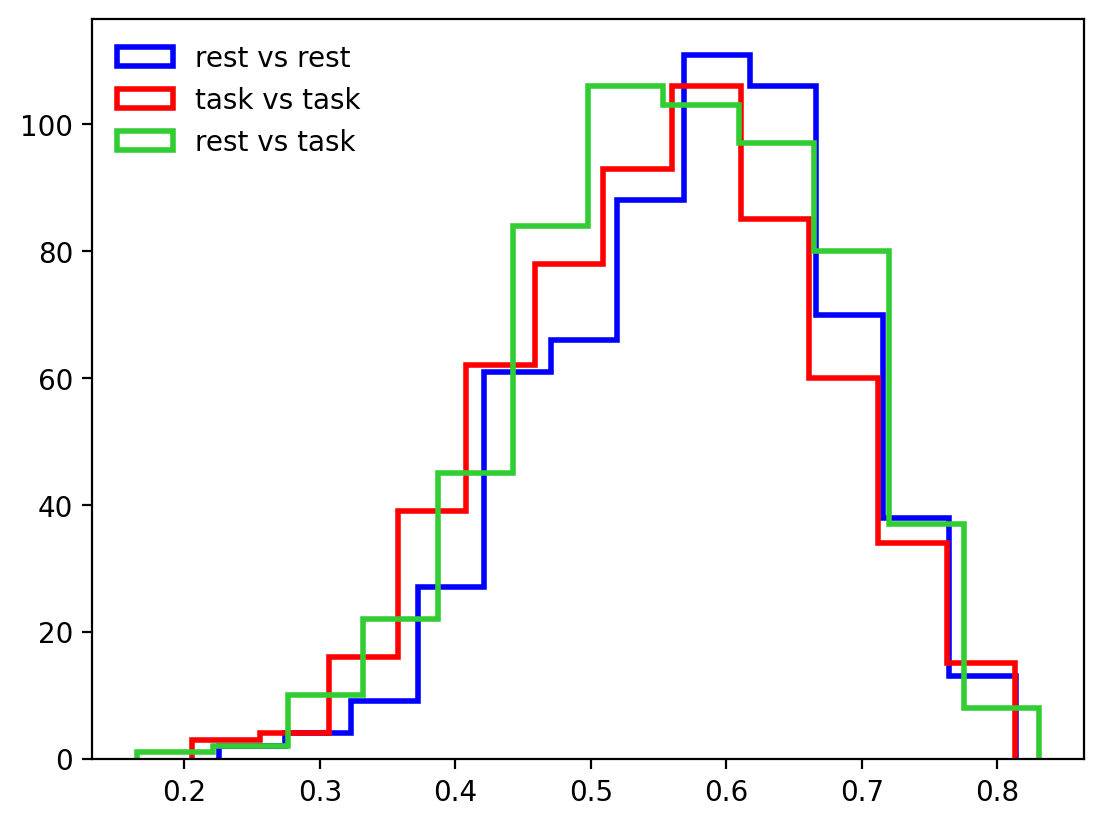

In [40]:
plt.hist(restvsrest[np.triu_indices(35,k=1)],histtype='step',color='blue',label='rest vs rest',linewidth=2,bins=12);
plt.hist(taskvstask[np.triu_indices(35,k=1)],histtype='step',color='red',label='task vs task',linewidth=2,bins=12);
plt.hist(restvstask[np.triu_indices(35,k=1)],histtype='step',color='limegreen',label='rest vs task',linewidth=2,bins=12);
plt.legend(frameon=False,loc=2)

In [41]:
mean_rest_syn  = np.median(synsrest,axis=0)
mean_task_syn  = np.median(synstask,axis=0)
mean_syn       = (mean_rest_syn + mean_task_syn)/2
stdev_rest_syn = iqr(synsrest,axis=0)
stdev_task_syn = iqr(synstask,axis=0)
mins_rest_syn  = np.min(synsrest,axis=0)
maxs_rest_syn  = np.max(synsrest,axis=0)
mins_task_syn  = np.min(synstask,axis=0)
maxs_task_syn  = np.max(synstask,axis=0)

GlassLambdaSyns = (mean_task_syn-mean_rest_syn)/stdev_rest_syn

sorted_Δs_idxs = np.argsort(GlassLambdaSyns)
sorted_Δs      = sorted(GlassLambdaSyns)

Text(0, 0.5, 'Effect Size (task-rest)')

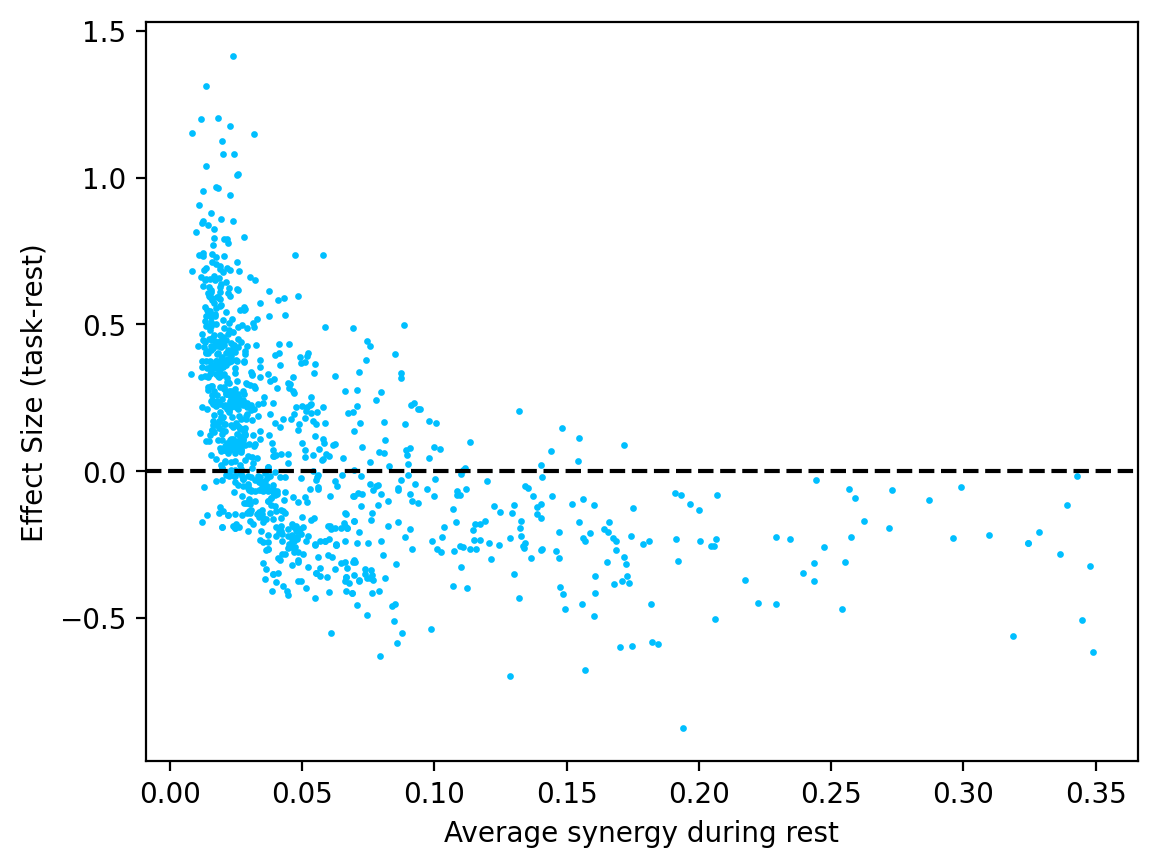

In [42]:
# plt.scatter(mean_syn,GlassLambda,s=2,c='deepskyblue')
plt.scatter(mean_rest_syn,GlassLambdaSyns,s=2,c='deepskyblue')
# plt.scatter(mean_task_syn,GlassLambda,s=2,c='deepskyblue')
plt.axhline(c='black',ls='--')
plt.xlabel('Average synergy during rest')
plt.ylabel('Effect Size (task-rest)')

In [43]:
hemispheres = [int(channel[-1])%2 for channel in pidtask['target'] if channel[-1]!='z']

Text(0, 0.5, 'Effect Size (task-rest)')

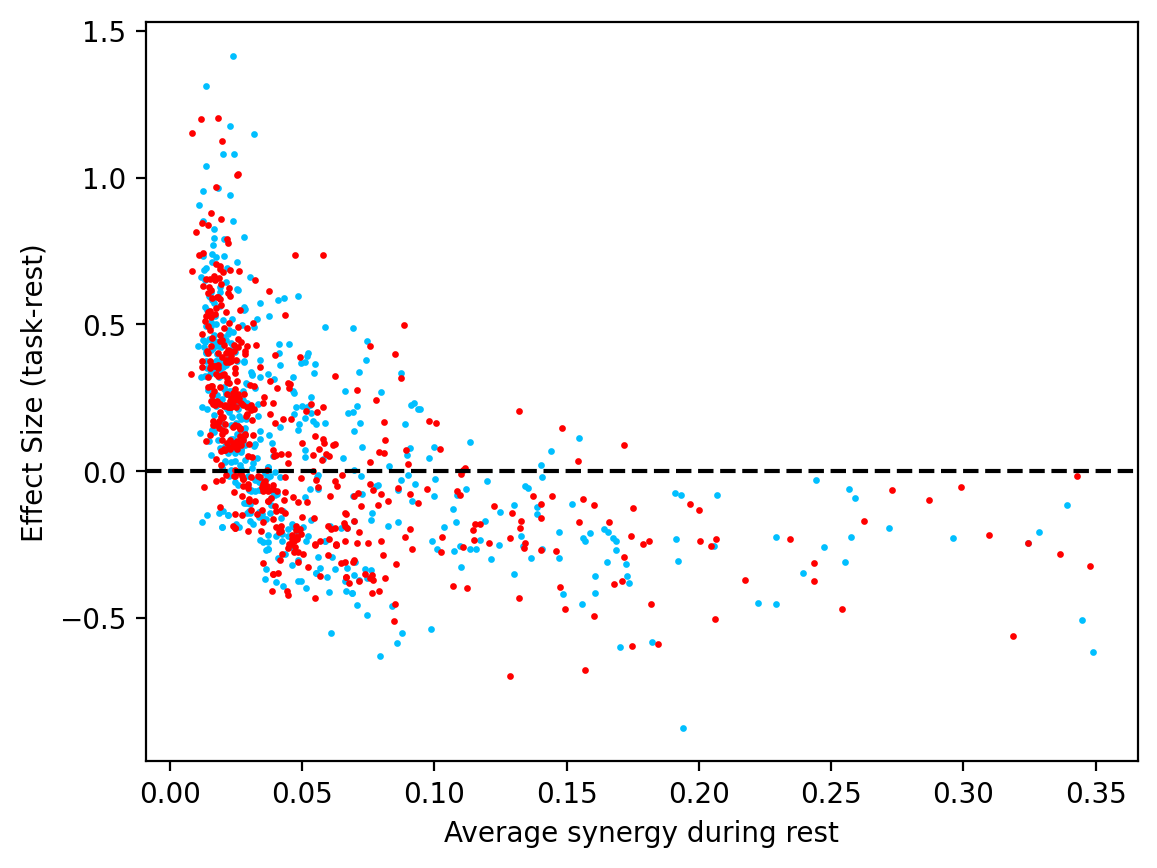

In [44]:
# plt.scatter(mean_syn,GlassLambda,s=2,c='deepskyblue')
plt.scatter(mean_rest_syn[:495],GlassLambdaSyns[:495],s=2,c='deepskyblue')
plt.scatter(mean_rest_syn[495:],GlassLambdaSyns[495:],s=2,c='red')

# plt.scatter(mean_task_syn,GlassLambda,s=2,c='deepskyblue')
plt.axhline(c='black',ls='--')
plt.xlabel('Average synergy during rest')
plt.ylabel('Effect Size (task-rest)')

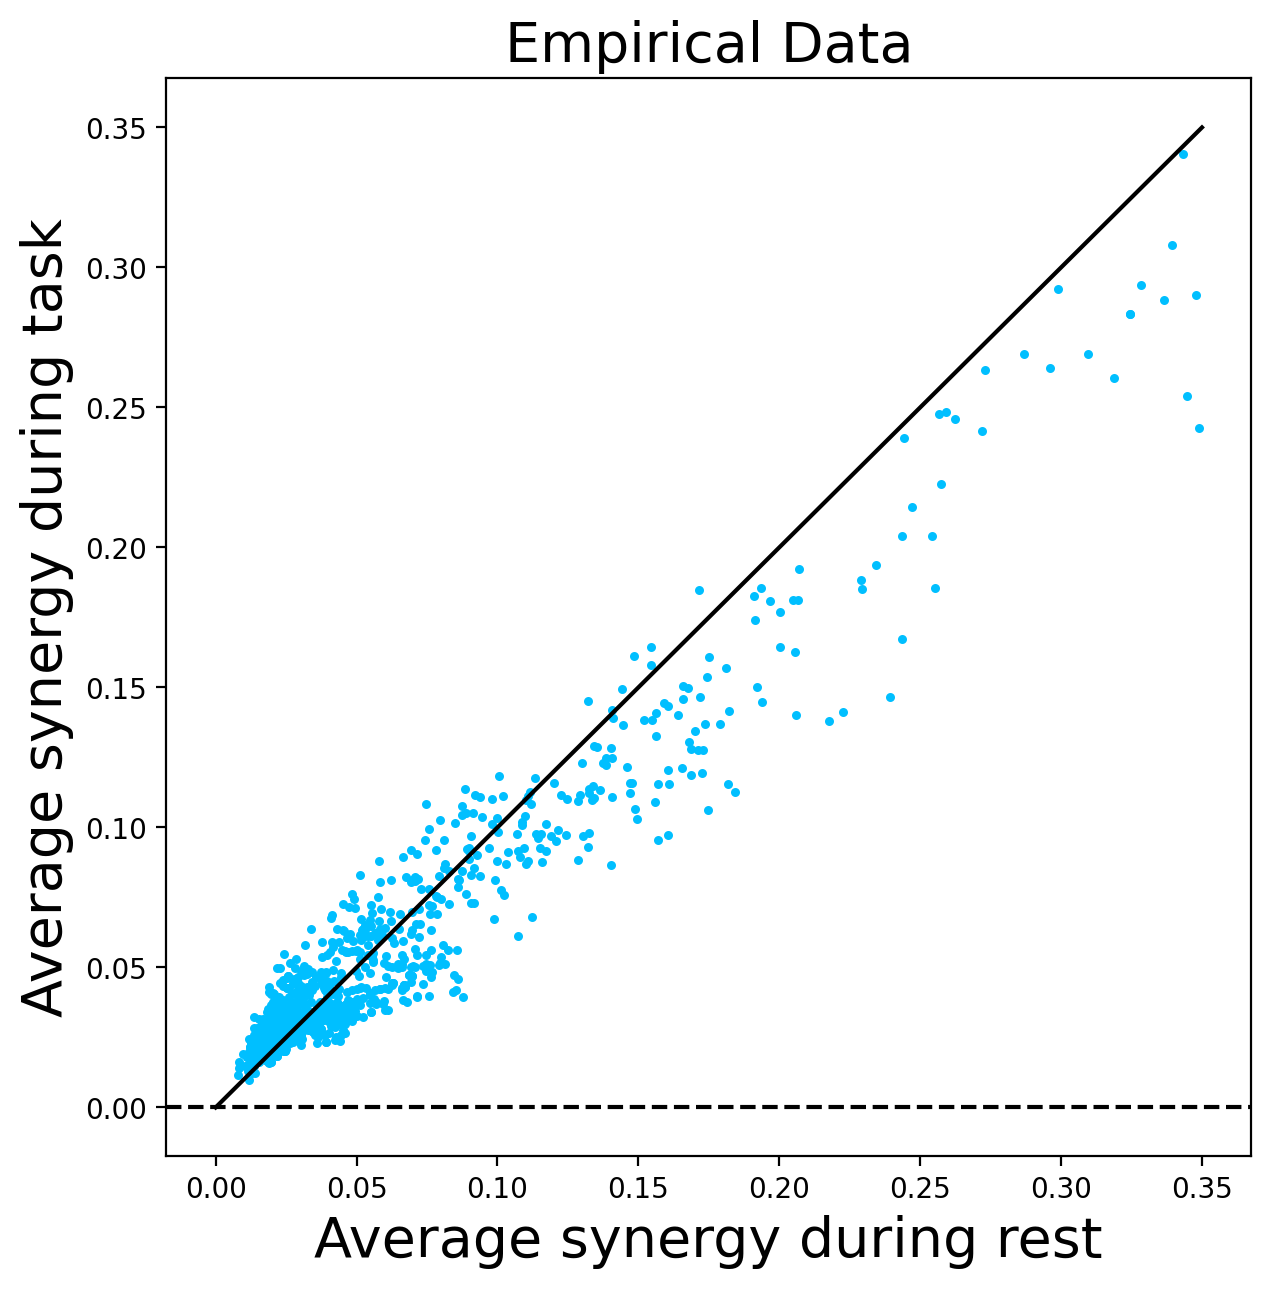

In [46]:
plt.figure(figsize=(7,7))
plt.scatter(mean_rest_syn,mean_task_syn,s=5,c='deepskyblue')
# plt.scatter(mean_task_syn,GlassLambda,s=2,c='deepskyblue')
plt.axhline(c='black',ls='--')
plt.xlabel('Average synergy during rest',fontsize=20)
plt.ylabel('Average synergy during task',fontsize=20)
plt.title('Empirical Data',fontsize=20)
# plt.plot(np.linspace(0,0.6),np.linspace(0,0.6),c='black')
plt.plot(np.linspace(0,0.35),np.linspace(0,0.35),c='black')

Text(0, 0.5, 'Synergy during rest')

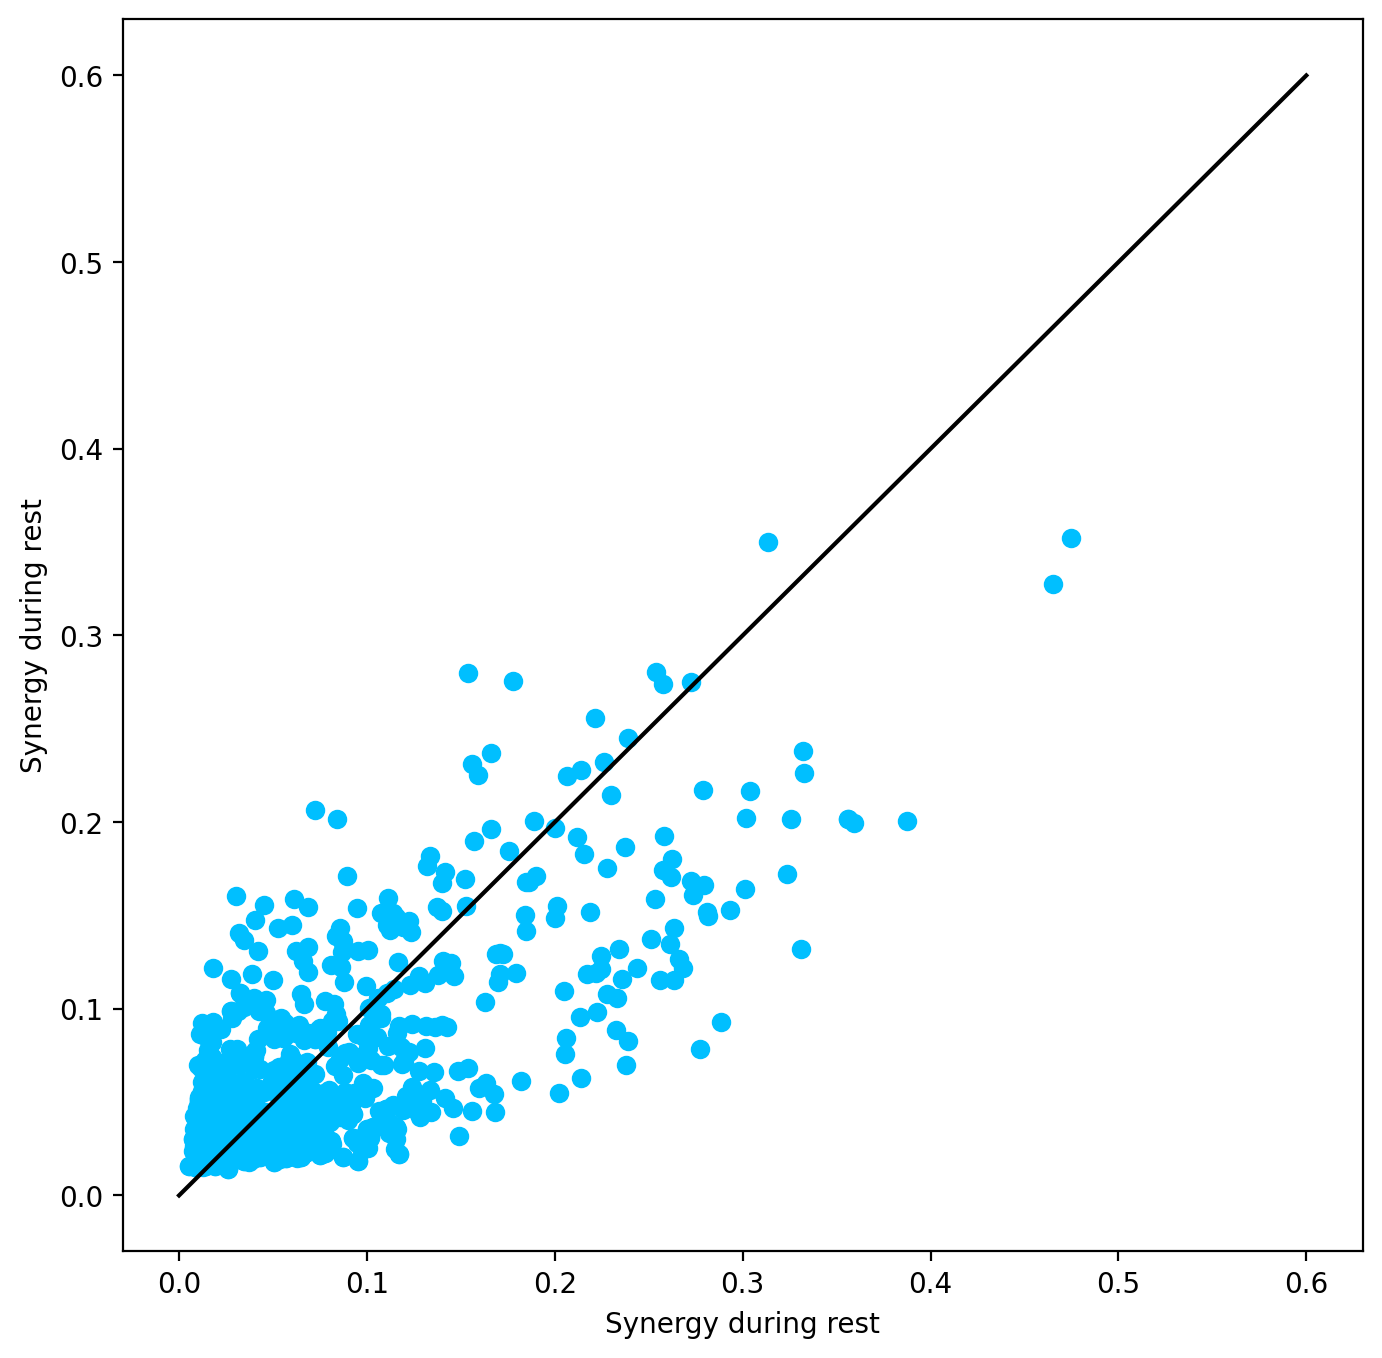

In [24]:
plt.figure(figsize=(8,8))
j=3

plt.scatter(synsrest[j],synstask[j],c='deepskyblue')
plt.plot(np.linspace(0,0.6),np.linspace(0,0.6),c='black')
plt.xlabel('Synergy during rest')
plt.ylabel('Synergy during rest')

In [25]:
def subject_asymmetry(j):
    plt.figure(figsize=(6,6))
    plt.scatter(synsrest[j],synstask[j]-synsrest[j],c='deepskyblue')
    plt.axhline(0,c='black',ls='--')
    plt.title('Distance to identity line (i.e. synergy at task- synergy at rest)')
    plt.xlabel('Synergy at rest')

In [26]:
interactive_plot = interactive(subject_asymmetry, j=IntSlider(min=0, max=34,
                                                           step=1, value=0,
                                                           continuous_update=False))
output = interactive_plot.children[-1]
# output.layout.height = '500px'
interactive_plot

interactive(children=(IntSlider(value=0, continuous_update=False, description='j', max=34), Output()), _dom_cl…

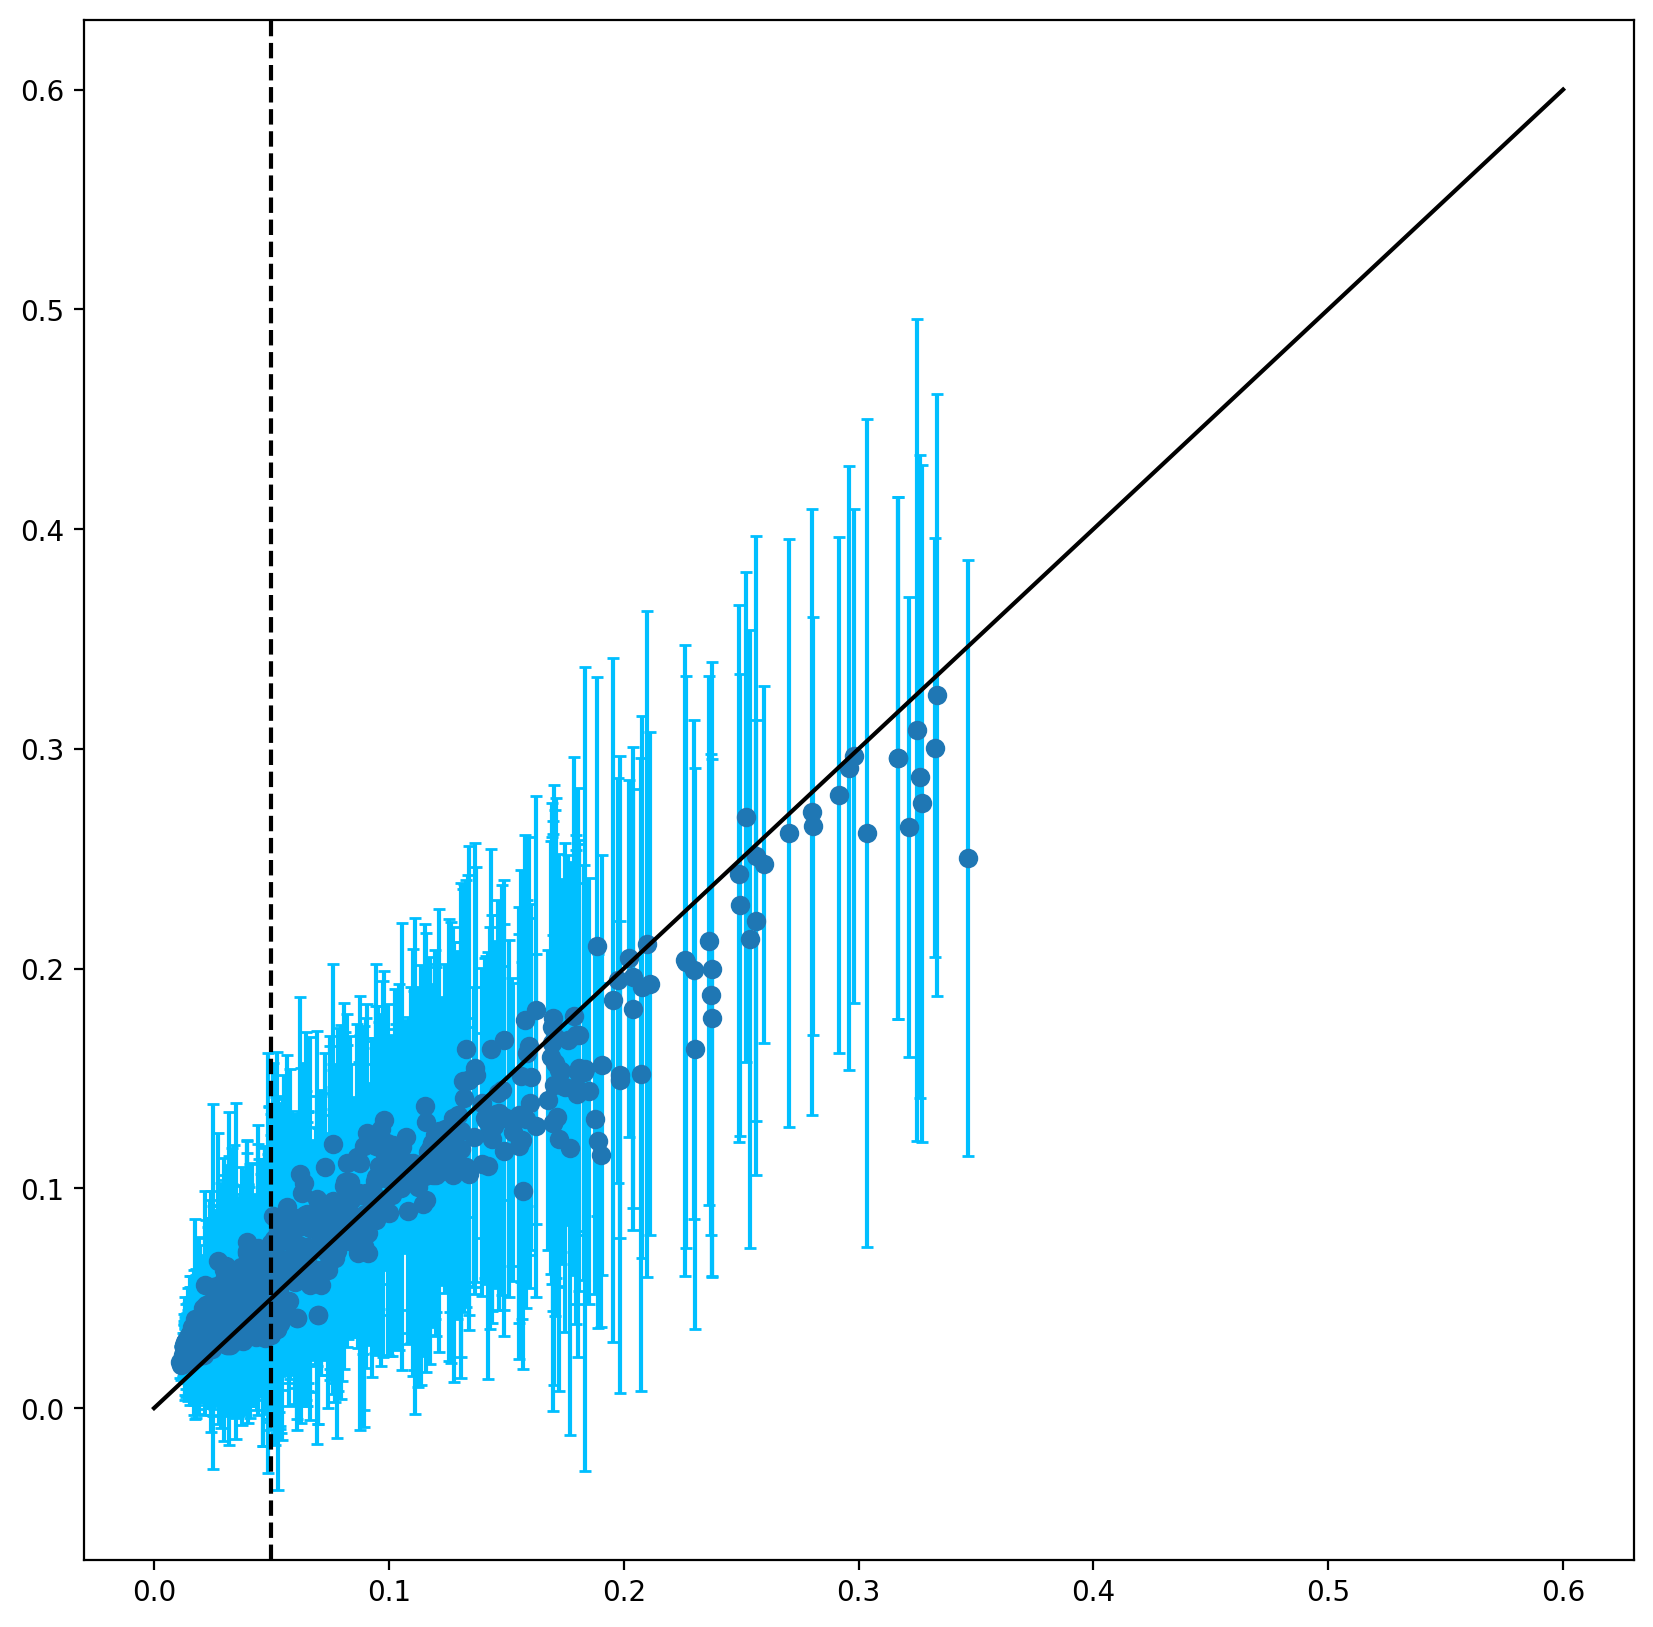

In [27]:
plt.figure(figsize=(10,10))
plt.errorbar(mean_rest_syn,mean_task_syn, yerr=stdev_task_syn, capsize=2, fmt="o",
             ecolor = "deepskyblue",zorder=1)
plt.plot(np.linspace(0,0.6),np.linspace(0,0.6),c='black',zorder=2)
plt.axvline(0.05,c='black',ls='--')

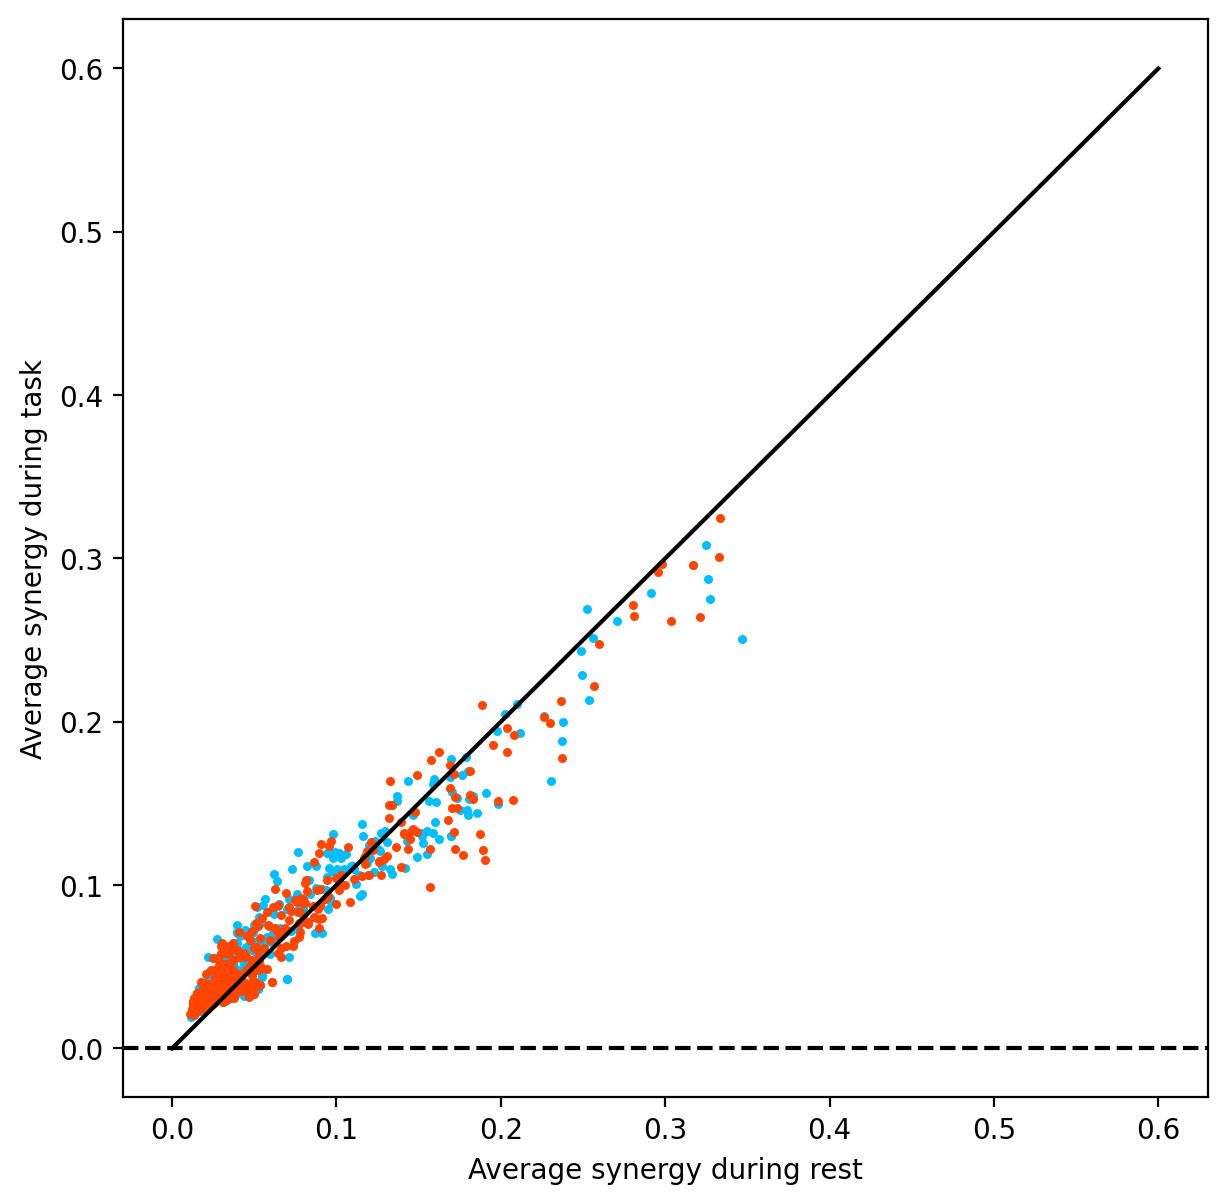

In [28]:
plt.figure(figsize=(7,7))
plt.scatter(mean_rest_syn[:495],mean_task_syn[:495],s=5,c='deepskyblue')
plt.scatter(mean_rest_syn[495:],mean_task_syn[495:],s=5,c='orangered')

# plt.scatter(mean_task_syn,GlassLambda,s=2,c='deepskyblue')
plt.axhline(c='black',ls='--')
plt.xlabel('Average synergy during rest')
plt.ylabel('Average synergy during task')
plt.plot(np.linspace(0,0.6),np.linspace(0,0.6),c='black')

In [29]:
plt.scatter(mean_rest_syn,mean_rest_red,s=2,c='deepskyblue',label='rest')
plt.scatter(mean_task_syn,mean_task_red,s=2,c='red',label='task')
plt.xlabel('redundancy')
plt.ylabel('synergy')
plt.legend(frameon=False)

NameError: name 'mean_rest_red' is not defined

In [47]:
n             = 10
sorlambs_idxs = list(windowed(sorted_Δs_idxs,n=n,step=n))

In [48]:
def see_topography(j):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('')
    fig.set_size_inches((12,4))
    ax1.plot(sorted_Δs,c='deepskyblue',marker='.',ls='')
    ax1.axhline(c='black',ls='--')
    ax1.set_title('Effect Sizes (sorted)',fontsize=20)
    ax1.set_ylabel(r'$\Delta$',fontsize=20);
    ax1.set_xlabel('Triplet #',fontsize=20)

#     ax1.annotate(r'$\Delta>0:$ task > rest', xy=(2, 0), xytext=(300, 0.5),fontsize=15)
#     ax1.annotate(r'$\Delta<0:$ rest > task', xy=(2, 0), xytext=(300, -0.5),fontsize=15)

    im     = plt.imread(r"C:\Users\rober\NeuNet\Useful_Diagrams\21_electrodes_of_International_10-20_system_for_EEG.png")
    implot = ax2.imshow(im)

    window = sorlambs_idxs[j]

    ax1.plot(range(n*j,n*(j+1)),sorted_Δs[n*j:n*(j+1)],ls='',c='blue',marker='.',ms=10)

    for i in window:
        s1 = channel_coords[pidrest.iloc[i].source1]
        s2 = channel_coords[pidrest.iloc[i].source2]
        t  = channel_coords[pidrest.iloc[i].target]
        ax2.scatter(s1.x,s1.y,s=370,alpha=0.1,c='blue')
        ax2.scatter(s2.x,s2.y,s=370,alpha=0.1,c='blue')
        ax2.scatter(t.x,t.y,s=370,alpha=0.1,c='blue')
        ax2.scatter(t.x,t.y,s=600,alpha=0.15,marker='s',facecolors='none',linewidths=3,color='red')

In [49]:
interactive_plot = interactive(see_topography, j=IntSlider(min=0, max=len(sorlambs_idxs)-1,
                                                           step=1, value=0,
                                                           continuous_update=False))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=0, continuous_update=False, description='j', max=98), Output(layout=Layo…

# <center>Redundancies

In [50]:
similarity_matrix_reds = np.corrcoef(reds)

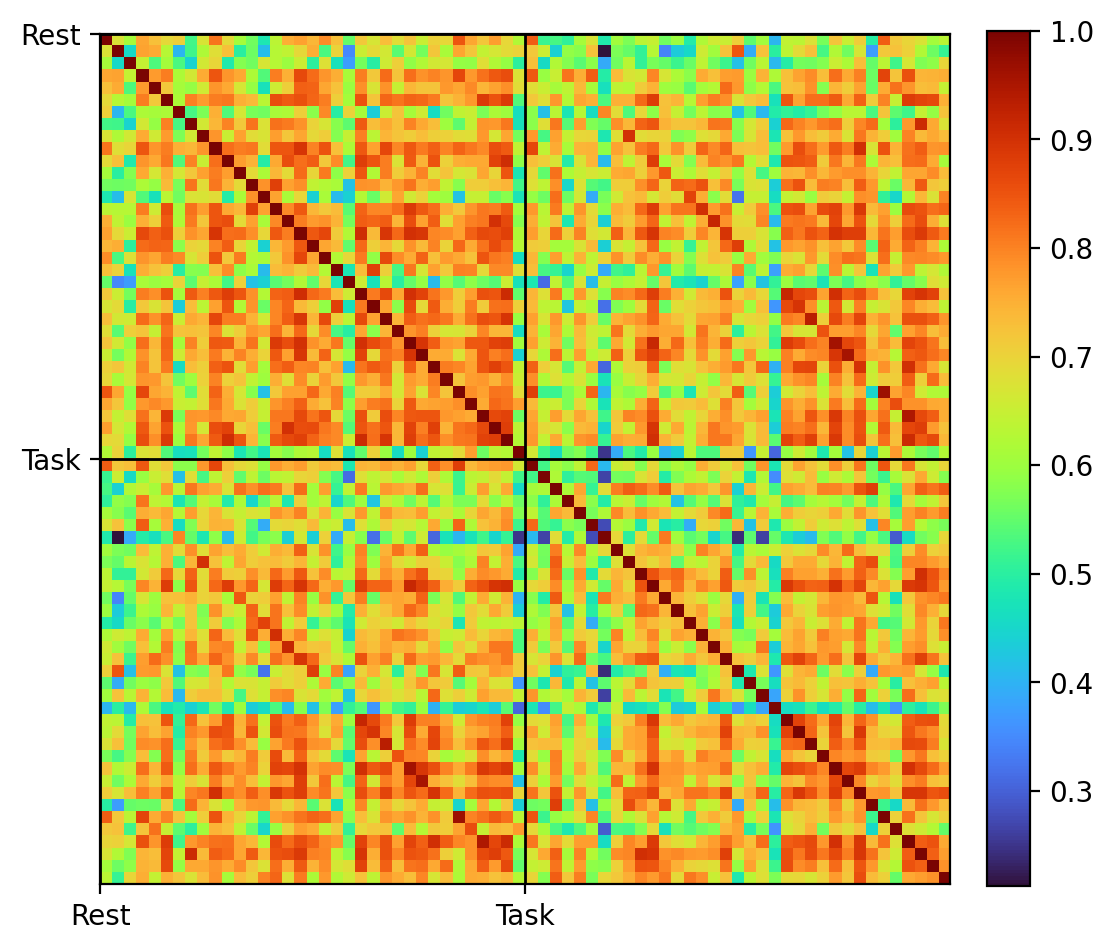

In [51]:
plt.figure(figsize=(6,6))
plt.imshow(similarity_matrix_reds,cmap='turbo', aspect='equal')
# plt.xticks(np.arange(1.5,70,2),range(35),rotation=45)
# plt.yticks(np.arange(1.5,70,2),range(35))
plt.xticks([-0.5,34.5],['Rest','Task'])
plt.yticks([-0.5,34.5],['Rest','Task'])

plt.grid(color='black', linestyle='-', linewidth=1)
plt.colorbar(fraction=0.046, pad=0.04)


In [52]:
np.mean(similarity_matrix_reds)

0.7017459171532866

In [53]:
mean_rest_red  = np.mean(redsrest,axis=0)
mean_task_red  = np.mean(redstask,axis=0)
mean_red       = (mean_rest_red + mean_task_red)/2
stdev_rest_red = np.std(redsrest,axis=0)

GlassLambdaReds = (mean_task_red-mean_rest_red)/stdev_rest_red

In [54]:
sorted_Δs_idxs = np.argsort(GlassLambdaReds)
sorted_Δs      = sorted(GlassLambdaReds)

Text(0, 0.5, 'Effect Size (task-rest)')

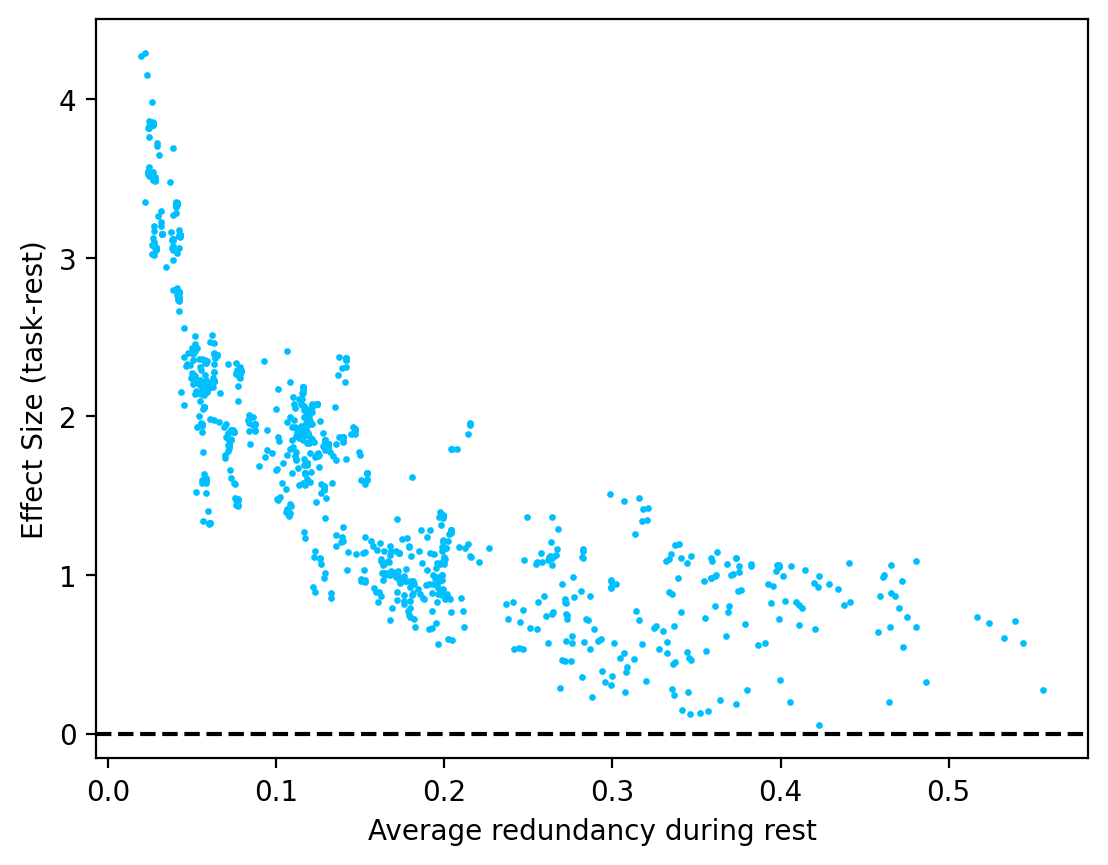

In [55]:
plt.scatter(mean_rest_red,GlassLambdaReds,s=2,c='deepskyblue')
# plt.scatter(mean_task_red,GlassLambdaReds,s=2,c='blue')
plt.axhline(c='black',ls='--')
plt.xlabel('Average redundancy during rest')
plt.ylabel('Effect Size (task-rest)')

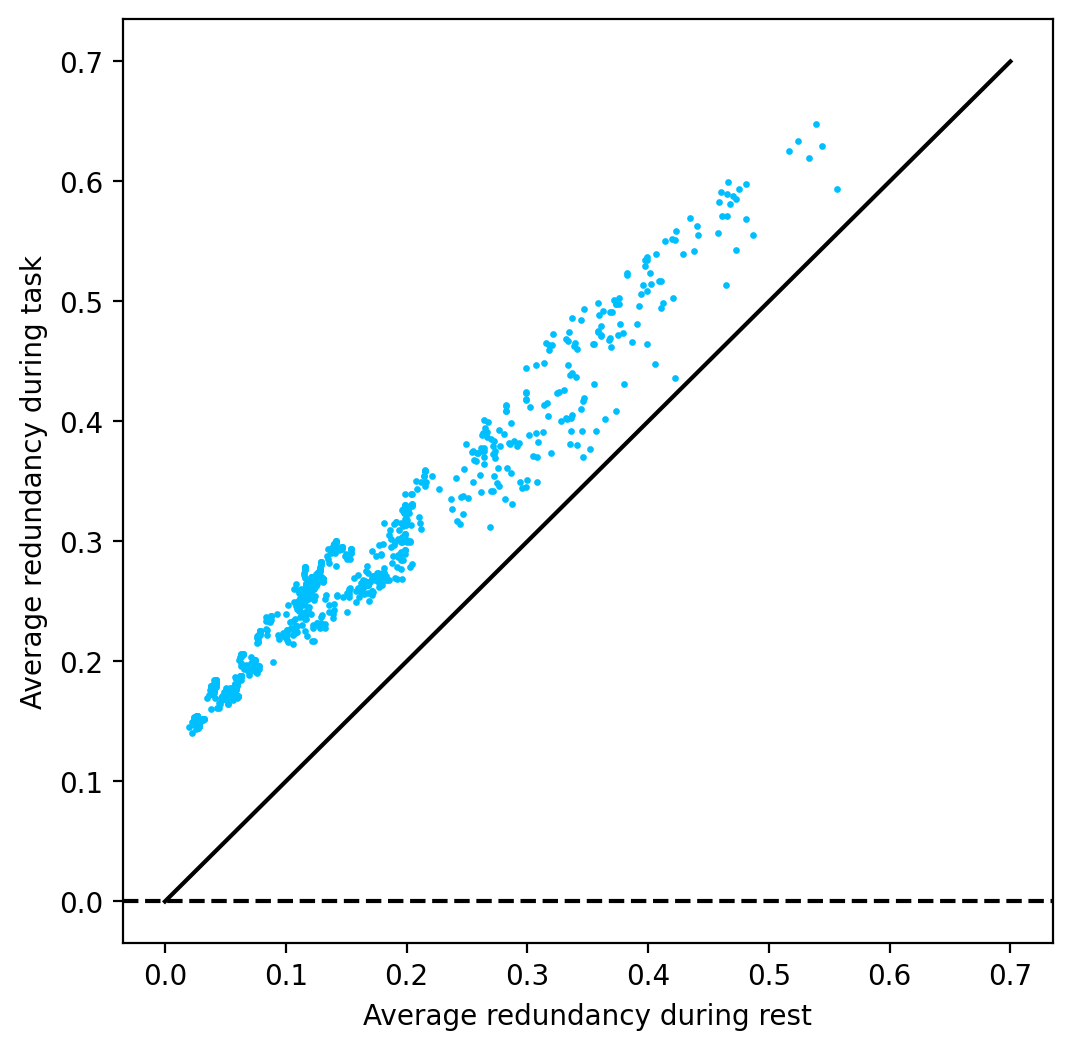

In [56]:
plt.figure(figsize=(6,6))

plt.scatter(mean_rest_red,mean_task_red,s=2,c='deepskyblue')
# plt.scatter(mean_task_red,GlassLambdaReds,s=2,c='blue')
plt.axhline(c='black',ls='--')
plt.xlabel('Average redundancy during rest')
plt.ylabel('Average redundancy during task')
plt.plot(np.linspace(0,0.7),np.linspace(0,0.7),c='black')

Text(0.5, 0, 'Triplet #')

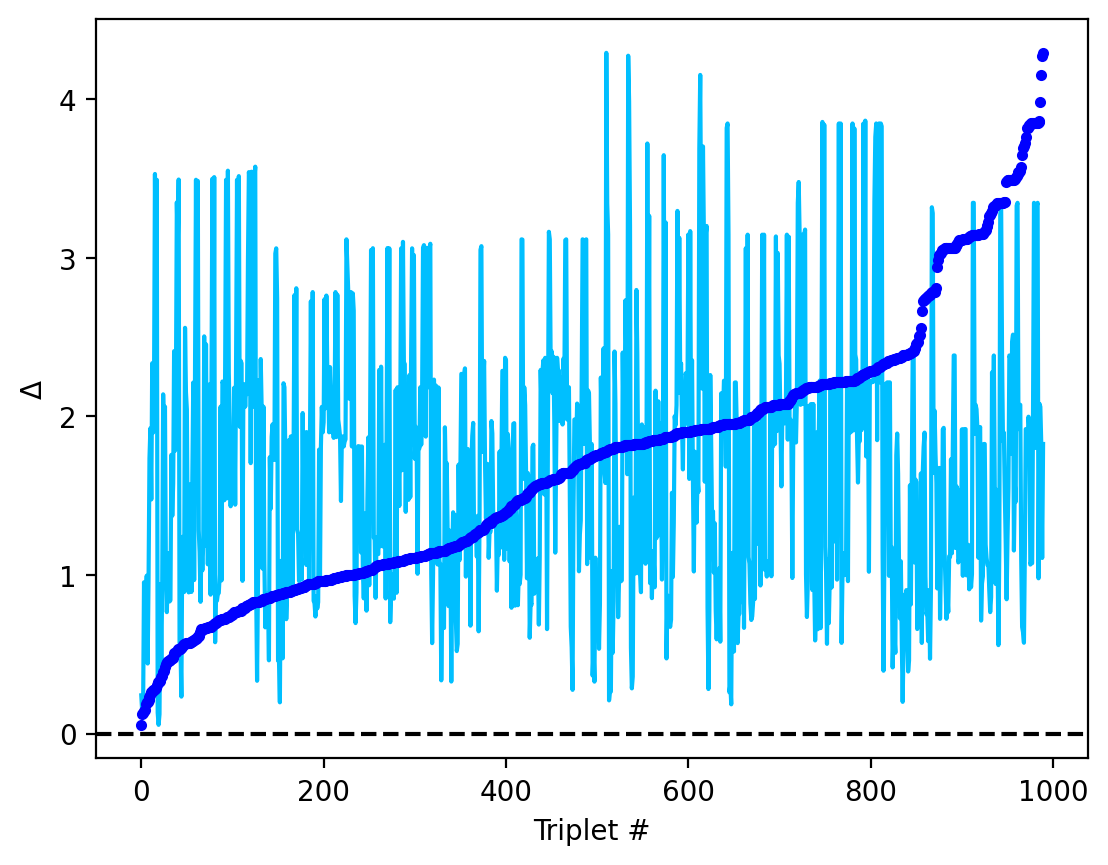

In [57]:
plt.plot(GlassLambdaReds,c='deepskyblue')
plt.plot(sorted_Δs,c='blue',marker='.',ls='')
plt.axhline(c='black',ls='--')

plt.ylabel(r'$\Delta$');
plt.xlabel('Triplet #')

In [58]:
n             = 5
sorlambs_idxs = list(windowed(sorted_Δs_idxs,n=n,step=n))

In [59]:
interactive_plot = interactive(see_topography, j=IntSlider(min=0, max=len(sorlambs_idxs)-1,
                                                           step=1, value=0,
                                                           continuous_update=False))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=0, continuous_update=False, description='j', max=197), Output(layout=Lay…

In [40]:
pidrest.iloc[sorted_Δs_idxs[:12]]

,Unnamed: 0,source1,source2,target,sinergy,unique1,unique2,redundancy
495,495,EEG Fp2,EEG F4,EEG F8,0.0296,0.0000,0.0073,0.1507
497,497,EEG F4,EEG F8,EEG Fp2,0.0368,0.0000,0.2046,0.1579
436,436,EEG T5,EEG O1,EEG P3,0.1089,0.0048,0.0000,0.2083
406,406,EEG C3,EEG O1,EEG P3,0.1215,0.0000,0.0557,0.2131
841,841,EEG T4,EEG P4,EEG T6,0.0015,0.0290,0.0000,0.0101
635,635,EEG F8,EEG C4,EEG F4,0.0763,0.0650,0.0000,0.1507
742,742,EEG F8,EEG T6,EEG T4,0.0098,0.0000,0.0213,0.0101
745,745,EEG F8,EEG P4,EEG T4,0.0185,0.0477,0.0000,0.0314
523,523,EEG Fp2,EEG T4,EEG F8,0.0086,0.0000,0.1265,0.0314
7,7,EEG Fp1,EEG C3,EEG F3,0.0579,0.0000,0.3060,0.2121


In [77]:
#------------------------------------------Remoción de los canales centrales:----------------------------
    
# pidrest[(pidrest["source1"].str.contains("z")==False) &
#          (pidrest["source2"].str.contains("z")==False) &
#          (pidrest["target"].str.contains("z")==False)]

,Unnamed: 0,source1,source2,target,sinergy,unique1,unique2,redundancy
0,0,EEG Fp1,EEG F3,EEG F7,0.0200,0.1035,0.0000,0.3544
1,1,EEG Fp1,EEG F7,EEG F3,0.1235,0.0000,0.0602,0.4579
2,2,EEG F3,EEG F7,EEG Fp1,0.0200,0.0000,0.1637,0.3544
3,3,EEG Fp1,EEG F3,EEG T3,0.0000,0.0000,0.0246,0.0359
4,4,EEG Fp1,EEG T3,EEG F3,0.0000,0.0000,0.4823,0.0359
...,...,...,...,...,...,...,...,...
901,901,EEG C4,EEG O2,EEG P4,0.1288,0.1014,0.0000,0.2123
902,902,EEG P4,EEG O2,EEG C4,0.0000,0.0000,0.1288,0.0836
930,930,EEG T6,EEG P4,EEG O2,0.0000,0.2986,0.0000,0.0151
931,931,EEG T6,EEG O2,EEG P4,0.0244,0.2746,0.0000,0.0391


# <center><font color=deepskyblue size=20> Focus on the frontal lobes

In [60]:
def find_triplet(pids,c1,c2,c3):
    c1     = pids[pids.source1.str.contains(c1) | pids.source2.str.contains(c1) | pids.target.str.contains(c1)]
    c1c2   = c1[c1.source1.str.contains(c2) | c1.source2.str.contains(c2) | c1.target.str.contains(c2)]
    c1c2c3 = c1c2[c1c2.source1.str.contains(c3) | c1c2.source2.str.contains(c3) | c1c2.target.str.contains(c3)]
    return c1c2c3

In [61]:
synsrest = []
synstask = []
redsrest = []
redstask = []

i       = 1
pidtask = pd.read_csv(r"C:\Users\rober\NeuNet\ArithmeticTasks\resultsPID\task_128\Subject"+str(i)+"_PID_task_128Hz_NonBinary10.csv")
pidrest = pd.read_csv(r"C:\Users\rober\NeuNet\ArithmeticTasks\resultsPID\rest_128\Subject"+str(i)+"_PID_rest_128Hz_NonBinary10.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\rober\\NeuNet\\ArithmeticTasks\\resultsPID\\task_128\\Subject1_PID_task_128Hz_NonBinary10.csv'

In [74]:
frontal_left_channels = ['EEG Fp1','EEG F3','EEG F7','EEG Cz']
frontal_left_triplets = list(combinations(frontal_left_channels,3))
frontal_left_triplets

[('EEG Fp1', 'EEG F3', 'EEG F7'),
 ('EEG Fp1', 'EEG F3', 'EEG Cz'),
 ('EEG Fp1', 'EEG F7', 'EEG Cz'),
 ('EEG F3', 'EEG F7', 'EEG Cz')]

In [101]:
trips1 = find_triplet(pidrest,*frontal_left_triplets[0])
trips2 = find_triplet(pidrest,*frontal_left_triplets[1])
trips3 = find_triplet(pidrest,*frontal_left_triplets[2])
trips4 = find_triplet(pidrest,*frontal_left_triplets[3])

pd.concat([trips1,trips2,trips3,trips4]).sinergy.to_numpy()

array([0.0429, 0.4024, 0.0429, 0.0731, 0.1963, 0.0731, 0.0712, 0.132 ,
       0.0712, 0.059 , 0.059 , 0.1213])

In [102]:
synsrest = []
synstask = []
redsrest = []
redstask = []

for i in range(35):
    pidtask = pd.read_csv(r"C:\Users\rober\NeuNet\ArithmeticTasks\resultsPID\task_128\Subject"+str(i)+"_PID_task_128Hz_NonBinary10.csv")
    pidrest = pd.read_csv(r"C:\Users\rober\NeuNet\ArithmeticTasks\resultsPID\rest_128\Subject"+str(i)+"_PID_rest_128Hz_NonBinary10.csv")

#   rest    
    triplets1R = find_triplet(pidrest,*frontal_left_triplets[0])
    triplets2R = find_triplet(pidrest,*frontal_left_triplets[1])
    triplets3R = find_triplet(pidrest,*frontal_left_triplets[2])
    triplets4R = find_triplet(pidrest,*frontal_left_triplets[3])
    synsrest.append(pd.concat([triplets1R,triplets2R,triplets3R,triplets4R]).sinergy.to_numpy())
    redsrest.append(pd.concat([triplets1R,triplets2R,triplets3R,triplets4R]).redundancy.to_numpy())

    #    task
    triplets1T = find_triplet(pidtask,*frontal_left_triplets[0])
    triplets2T = find_triplet(pidtask,*frontal_left_triplets[1])
    triplets3T = find_triplet(pidtask,*frontal_left_triplets[2])
    triplets4T = find_triplet(pidtask,*frontal_left_triplets[3])
    synstask.append(pd.concat([triplets1T,triplets2T,triplets3T,triplets4T]).sinergy.to_numpy())
    redstask.append(pd.concat([triplets1T,triplets2T,triplets3T,triplets4T]).redundancy.to_numpy())

In [103]:
synsrest = np.array(synsrest) 
synstask = np.array(synstask) 
redsrest = np.array(redsrest) 
redstask = np.array(redstask)      
syns     = np.vstack((synsrest,synstask)) 
reds     = np.vstack((redsrest,redstask)) 

In [104]:
similarity_matrix_syns = np.corrcoef(syns)

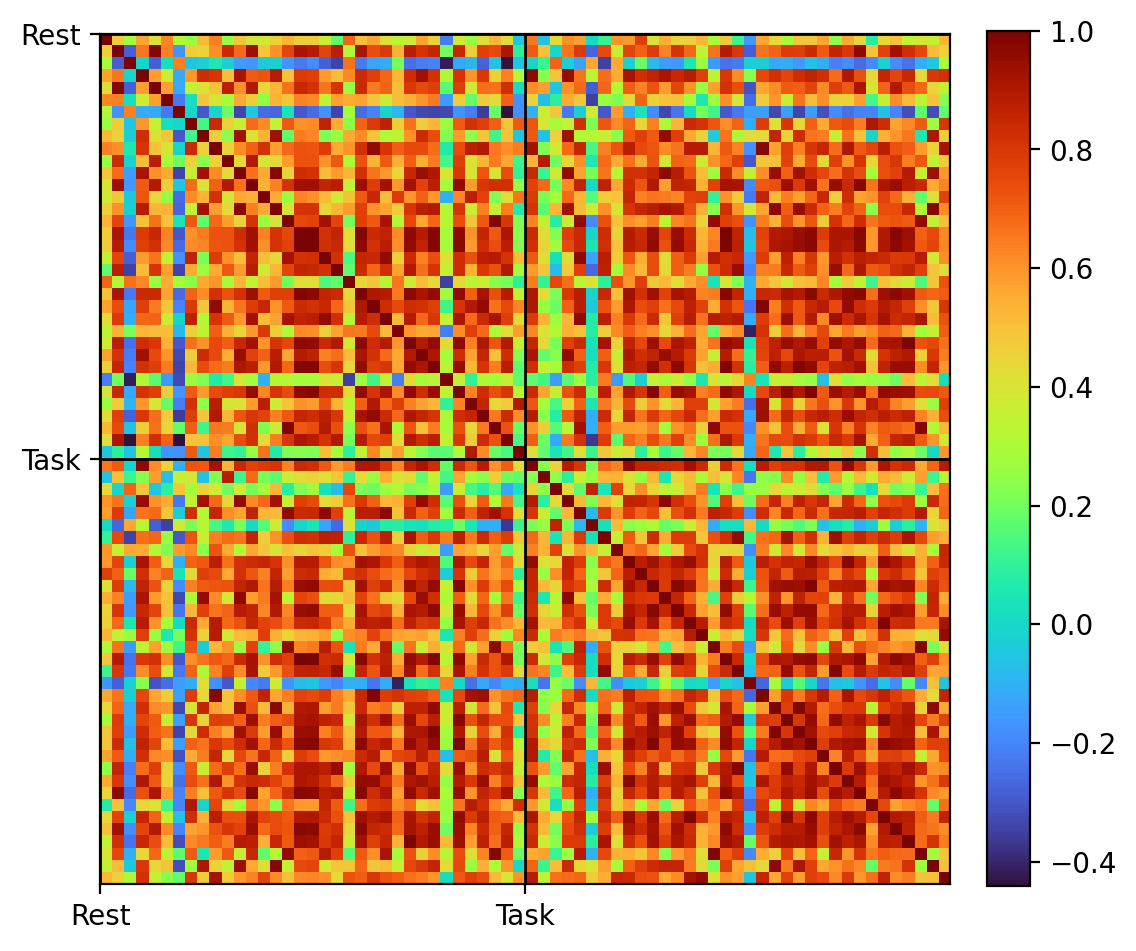

In [106]:
plt.figure(figsize=(6,6))
plt.imshow(similarity_matrix_syns,cmap='turbo', aspect='equal')
# plt.xticks(np.arange(1.5,70,2),range(35),rotation=45)
# plt.yticks(np.arange(1.5,70,2),range(35))
plt.xticks([-0.5,34.5],['Rest','Task'])
plt.yticks([-0.5,34.5],['Rest','Task'])

plt.grid(color='black', linestyle='-', linewidth=1)
plt.colorbar(fraction=0.046, pad=0.04)